# Data Description

### Codebook
* quality: a measure of the quality of the recorded video.
* bits: number of bits used to encode that block in the video stream.
* intra_parts: number sub-blocks inside this block that are not encoded by making use of
information in other frames.
* skip_parts: number sub-blocks inside this block that are straight-forward copied from another
frame.
* inter_16x16_parts: number of sub-blocks inside this block making use of information in other
frames and whose size is 16x16 pixels.
* inter_4x4_parts: number of sub-blocks inside this block making use of information in other
frames and whose size is 4x4 pixels.
* inter_other_parts: number of sub-blocks inside this block making use of information in other
frames and whose size is different from 16x16 and 4x4 pixels.
* non_zero_pixels: number of pixels different from 0 after encoding the block.
* frame_width: the width of the video frame in pixels.
* frame_height: the height of the video frame in pixels.
* movement_level: a measure of the level of movement of this frame with respect the previous
one.
* mean: mean of the pixels of the encoded block.
* sub_mean_1: mean of the pixels contained in the first 32x32 sub-bock of the current block.
* sub_mean_2: mean of the pixels contained in the second 32x32 sub-bock of the current block.
* sub_mean_3: mean of the pixels contained in the third 32x32 sub-bock of the current block.
* sub_mean_4: mean of the pixels contained in the fourth 32x32 sub-bock of the current block.
* var_sub_blocks: variance of the four previous values.
* sobel_h: mean of the pixels of the encoded block after applying the Sobel operator in
horizontal direction.
* sobel_v: mean of the pixels of the encoded block after applying the Sobel operator in vertical
direction.
* variance: variance of the pixels of the encoded block.
* block_movement_h: a measure of the movement of the current block in the horizontal
direction.
* block_movement_v: a measure of the movement of the current block in the vertical direction.
* var_movement_h: a measure of the variance of the movements inside the current block in the
horizontal direction.
* var_movement_v: a measure of the variance of the movements inside the current block in the
vertical direction.
* cost_1: a measure of the cost of encoding this block without partitioning it.
* cost_2: a measure of the cost of encoding this block without partitioning it and without
considering any movement in it.
* relevant: the target variable that indicates whether the current block is relevant (1) or not (0).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv', sep=';')
print(df.isna().sum())
df  = df.dropna()
df.shape

quality               0
bits                  0
intra_parts           0
skip_parts            0
inter_16x16_parts     0
inter_4x4_parts       0
inter_other_parts     0
non_zero_pixels       0
frame_width           0
frame_height          0
movement_level        0
mean                  0
sub_mean_1            0
sub_mean_2            0
sub_mean_3           14
sub_mean_4            0
var_sub_blocks        0
sobel_h               0
sobel_v               0
variance              0
block_movement_h      0
block_movement_v      0
var_movement_h        0
var_movement_v        0
cost_1                0
cost_2               17
relevant              2
dtype: int64


(15967, 27)

<AxesSubplot:xlabel='frame_height'>

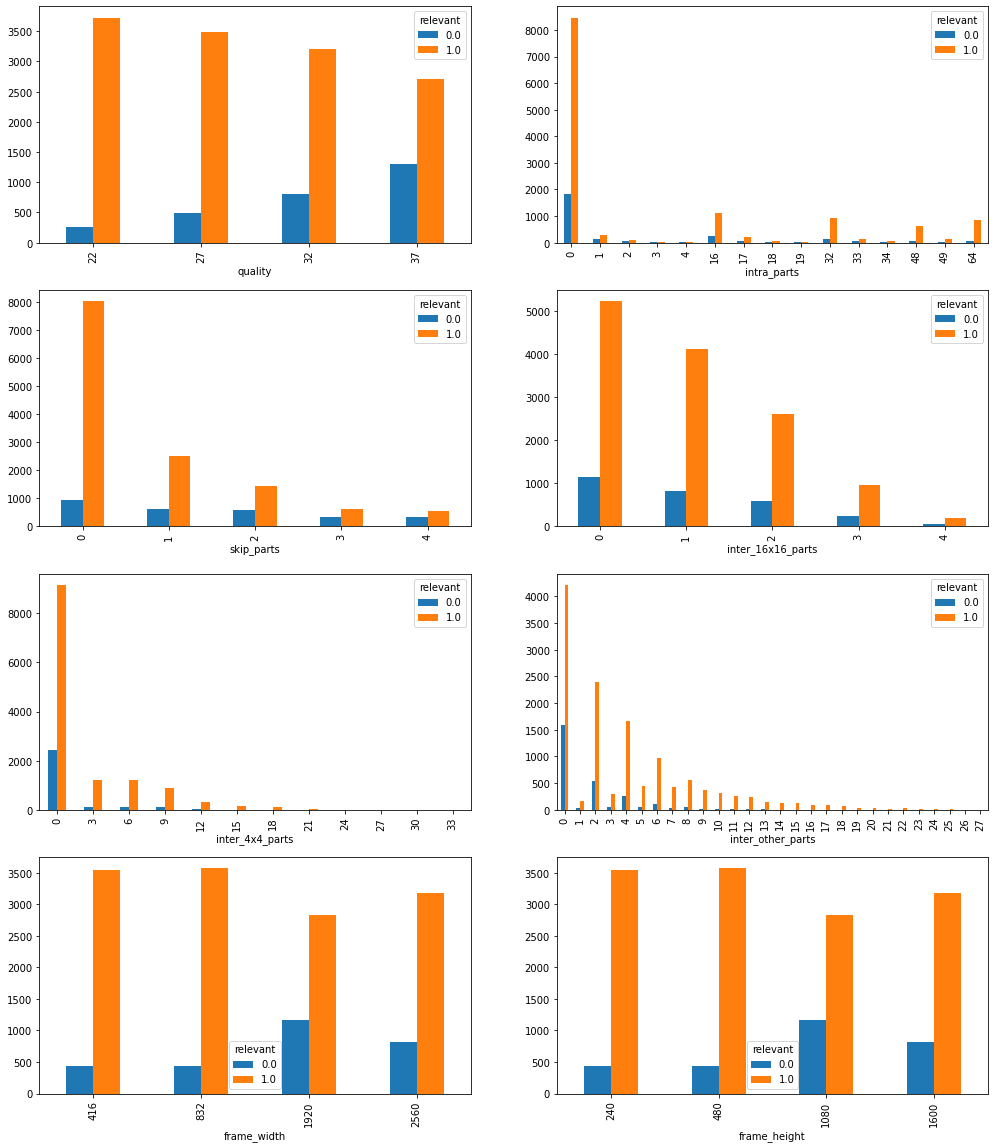

In [3]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(ncols=2, nrows=4,figsize=(17, 20))
pd.crosstab(df.quality, df.relevant).plot(kind='bar', ax=ax1)
pd.crosstab(df.intra_parts, df.relevant).plot(kind='bar', ax=ax2)
pd.crosstab(df.skip_parts, df.relevant).plot(kind='bar', ax=ax3)
pd.crosstab(df.inter_16x16_parts, df.relevant).plot(kind='bar', ax=ax4)
pd.crosstab(df.inter_4x4_parts, df.relevant).plot(kind='bar', ax=ax5)
pd.crosstab(df.inter_other_parts, df.relevant).plot(kind='bar', ax=ax6)
pd.crosstab(df.frame_width, df.relevant).plot(kind='bar', ax=ax7)
pd.crosstab(df.frame_height, df.relevant).plot(kind='bar', ax=ax8)

In [81]:
cat = df.loc[:, df.nunique() < 30]
cont = df.loc[:, df.nunique() >= 30]

<AxesSubplot:xlabel='relevant', ylabel='cost_2'>

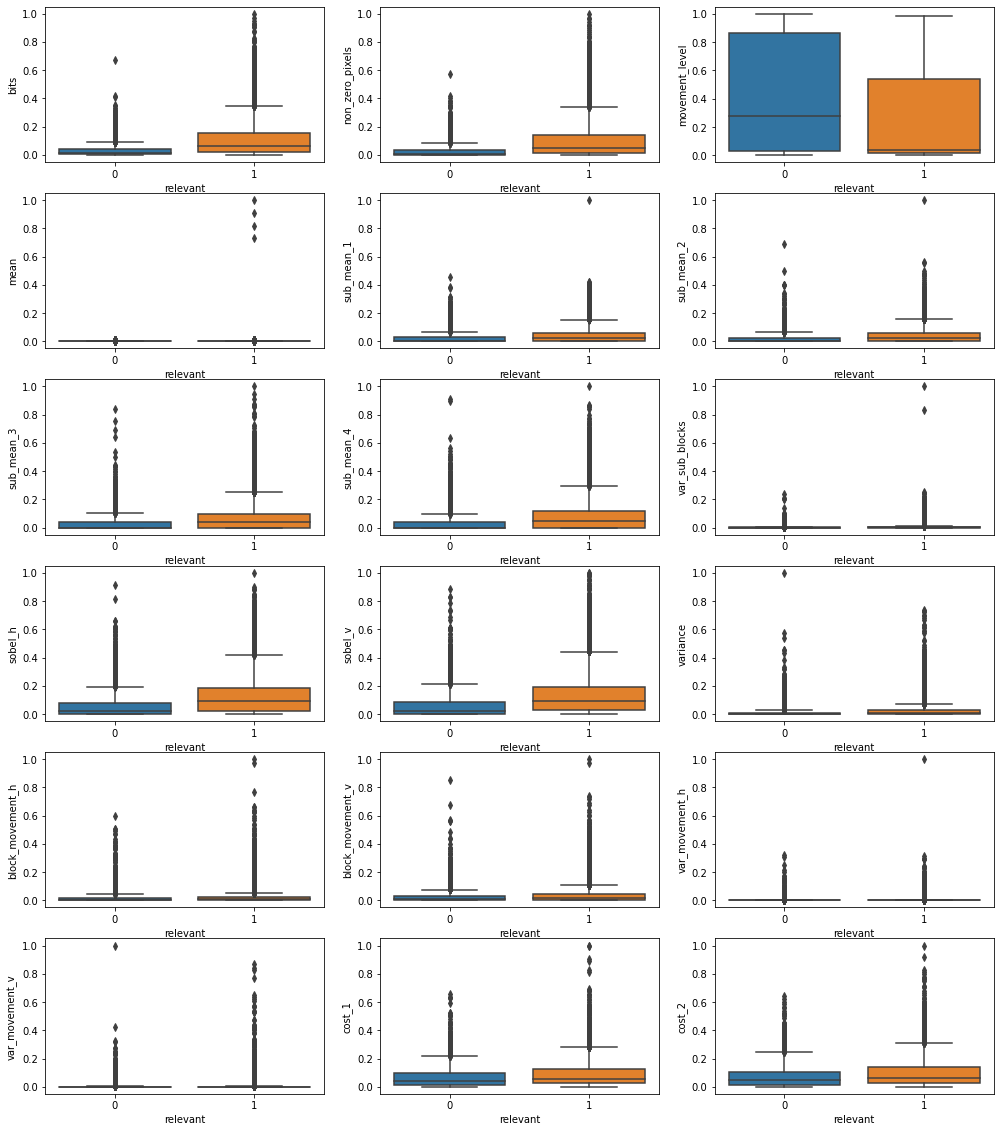

In [82]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, ax18)) = plt.subplots(ncols=3, nrows=6,figsize=(17, 20))
sns.boxplot(y=cont_rel.columns[0], x="relevant", data=df, ax=ax1)
sns.boxplot(y=cont_rel.columns[1],x="relevant", data=df, ax=ax2)
sns.boxplot(y=cont_rel.columns[2], x="relevant", data=df, ax=ax3)
sns.boxplot(y=cont_rel.columns[3], x="relevant", data=df, ax=ax4)
sns.boxplot(y=cont_rel.columns[4], x="relevant", data=df, ax=ax5)
sns.boxplot(y=cont_rel.columns[5], x="relevant", data=df, ax=ax6)
sns.boxplot(y=cont_rel.columns[6], x="relevant", data=df, ax=ax7)
sns.boxplot(y=cont_rel.columns[7], x="relevant", data=df, ax=ax8)
sns.boxplot(y=cont_rel.columns[8], x="relevant", data=df, ax=ax9)
sns.boxplot(y=cont_rel.columns[9], x="relevant", data=df, ax=ax10)
sns.boxplot(y=cont_rel.columns[10], x="relevant", data=df, ax=ax11)
sns.boxplot(y=cont_rel.columns[11], x="relevant", data=df, ax=ax12)
sns.boxplot(y=cont_rel.columns[12], x="relevant", data=df, ax=ax13)
sns.boxplot(y=cont_rel.columns[13], x="relevant", data=df, ax=ax14)
sns.boxplot(y=cont_rel.columns[14], x="relevant", data=df, ax=ax15)
sns.boxplot(y=cont_rel.columns[15], x="relevant", data=df, ax=ax16)
sns.boxplot(y=cont_rel.columns[16], x="relevant", data=df, ax=ax17)
sns.boxplot(y=cont_rel.columns[17], x="relevant", data=df, ax=ax18)

In [ ]:
# The proportion of useful infomation per square
df["pixels_height_width"] = (df['frame_height']*df['frame_width'])/df['non_zero_pixels']
df = df.drop(['frame_height', 'frame_width', 'non_zero_pixels'], axis = 1)

In [ ]:
# weighted variance of sub-blocks
df['sub_mean'] = (df['sub_mean_1']+ df['sub_mean_2'] + df['sub_mean_3'] +df['sub_mean_4'])/4
df = df.drop(['sub_mean_1', 'sub_mean_2', 'sub_mean_3', 'sub_mean_4'], axis=1)

In [ ]:
# variability per block movement
#df['movement'] = (df['var_movement_h'] + df['var_movement_v'])/(df['block_movement_h'] + df['block_movement_v'])
df['movement_var'] = ((df['block_movement_h']/df['var_movement_h'])+(df['block_movement_v']/df['var_movement_v']))/2
df = df.drop(['block_movement_h', 'block_movement_v', 'var_movement_h', 'var_movement_v'], axis=1)

In [ ]:
df['cost'] = (df['cost_1']+df['cost_2'])/2
df = df.drop(['cost_1', 'cost_2'], axis=1)

In [ ]:
df['sobel'] = (df['sobel_h']+df['sobel_v'])/2
df = df.drop(['sobel_h', 'sobel_v'], axis=1)

In [ ]:
df = df.drop(["inter_16x16_parts", "mean"], axis=1)

In [ ]:
plt.figure(figsize=(18, 15))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# deleting based on correlation pattern with other variables
df = df.drop(["var_sub_blocks", "sub_mean", "movement_var"], axis=1) # maybe remove "sobel" too

In [ ]:
plt.figure(figsize=(11, 8))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df.describe().T

In [5]:
df.nunique()

quality                  4
bits                  2104
intra_parts             15
skip_parts               5
inter_16x16_parts        5
inter_4x4_parts         12
inter_other_parts       28
non_zero_pixels        568
frame_width              4
frame_height             4
movement_level         205
mean                  6591
sub_mean_1            3119
sub_mean_2            3020
sub_mean_3            3072
sub_mean_4            2974
var_sub_blocks       11427
sobel_h               9891
sobel_v               9875
variance             11971
block_movement_h      2363
block_movement_v      2219
var_movement_h        8408
var_movement_v        8437
cost_1               14358
cost_2               14526
relevant                 2
dtype: int64

In [6]:
df['intra_parts'].unique()

array([ 0, 16, 32,  1, 48, 17,  2,  4, 33, 64, 34,  3, 49, 19, 18],
      dtype=int64)

In [7]:
df['quality'].unique()

array([22, 27, 32, 37], dtype=int64)

In [8]:
df['relevant'].value_counts()

1.0    13126
0.0     2841
Name: relevant, dtype: int64

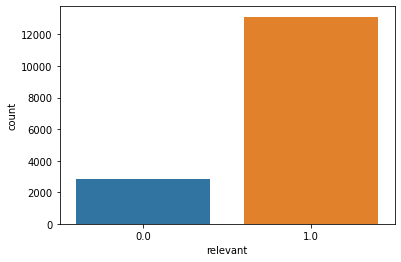

In [9]:
sns.countplot(x='relevant', data=df)
plt.show()

In [10]:
#Check variables relation

cat = df.loc[:, df.nunique() < 30]
cont = df.loc[:, df.nunique() >= 30]

In [11]:
cat.groupby('relevant').mean()

,quality,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,frame_width,frame_height
relevant,,,,,,,,
0.0,32.519183,7.931362,1.463569,1.017599,1.021119,1.81415,1703.434002,1006.490672
1.0,28.860049,11.699071,0.716974,0.991010,2.183605,4.08906,1372.506476,815.608716


<AxesSubplot:xlabel='inter_other_parts'>

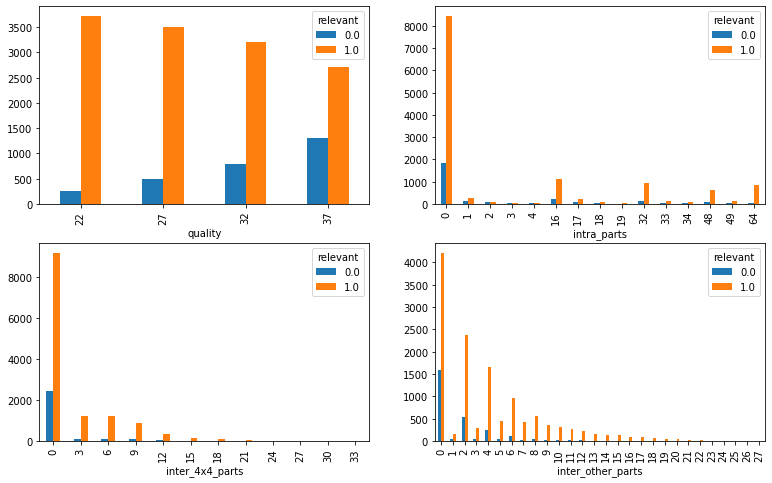

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2,figsize=(13, 8))
pd.crosstab(df.quality, df.relevant).plot(kind='bar', ax=ax1)
pd.crosstab(df.intra_parts, df.relevant).plot(kind='bar', ax=ax2)
#pd.crosstab(df.skip_parts, df.relevant).plot(kind='bar', ax=ax3)
#pd.crosstab(df.inter_16x16_parts, df.relevant).plot(kind='bar', ax=ax4)
pd.crosstab(df.inter_4x4_parts, df.relevant).plot(kind='bar', ax=ax3)
pd.crosstab(df.inter_other_parts, df.relevant).plot(kind='bar', ax=ax4)
#pd.crosstab(df.frame_width, df.relevant).plot(kind='bar', ax=ax7)
#pd.crosstab(df.frame_height, df.relevant).plot(kind='bar', ax=ax8)

In [13]:
lst = cont.columns.tolist()
lst.append('relevant')
cont_rel = df[lst]
cont_rel.groupby('relevant').mean()

,bits,non_zero_pixels,movement_level,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4,var_sub_blocks,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2
relevant,,,,,,,,,,,,,,,,,,
0.0,151.430834,21.758184,4.855167e+06,1.578761,1.770525,1.684900,1.587751,1.271866,4.232547,4.180749,4.214997,29.596506,7.680622,5.120540,977.907523,411.119971,30353.513200,34941.264344
1.0,513.746610,85.281807,3.850511e+06,3.875459,3.439649,3.224487,3.346686,3.190540,7.060803,8.853718,9.144358,58.463528,8.079251,7.161667,803.575505,509.430599,38431.931967,43625.962060


Text(0, 0.5, 'Frequency')

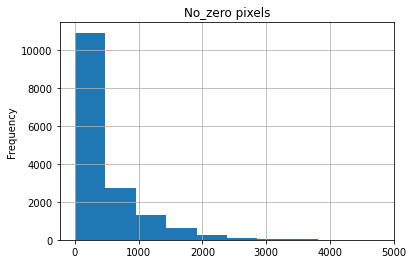

In [14]:
cont_rel.bits.hist()
plt.title('No_zero pixels')
plt.ylabel('Frequency')

<AxesSubplot:xlabel='relevant', ylabel='sub_mean_1'>

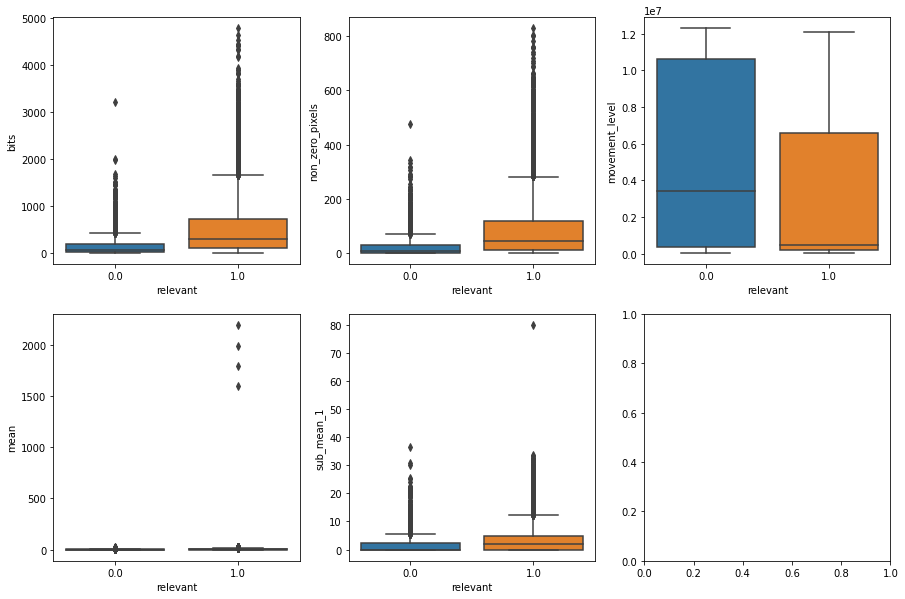

In [15]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2,figsize=(15, 10))
sns.boxplot(y=cont_rel.columns[0], x="relevant", data=df, ax=ax1)
sns.boxplot(y=cont_rel.columns[1],x="relevant", data=df, ax=ax2)
sns.boxplot(y=cont_rel.columns[2], x="relevant", data=df, ax=ax3)
sns.boxplot(y=cont_rel.columns[3], x="relevant", data=df, ax=ax4)
sns.boxplot(y=cont_rel.columns[4], x="relevant", data=df, ax=ax5)

In [16]:
# Checking if all the sub-groups (relevant=0 and relevant=1) of variables are statistically different from each other

In [17]:
from scipy.stats import ttest_rel
from statsmodels.stats.stattools import jarque_bera
import random

In [18]:
def equality_testing(df, variables, y):
    
    def check_normality(var):
            normality = jarque_bera(var)
            if float(normality[1]) < 0.5:
                print(" violates the normality!")
    

    for el in variables:
        zero_y = df.loc[df[y] == 0][el].tolist()
        one_y = df.loc[df[y] == 1][el].tolist()
        print(el.upper())
        sample_size = max(len(zero_y), len(one_y))
        zero_y = random.choices(zero_y, k = sample_size)
        one_y = random.choices(one_y, k = sample_size)
        check_normality(zero_y)
        check_normality(one_y)
        
        if ttest_rel(zero_y, one_y).pvalue >=0.5:
            print("!!!The groups related to 1 or 0 have the same mean :" + el) 
        else:
            print("!!!The groups related to 1 or 0 are different :" + el)

In [19]:
equality_testing(cont_rel, cont_rel.columns[:-1].tolist(), cont_rel.columns[-1])

BITS
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :bits
NON_ZERO_PIXELS
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :non_zero_pixels
MOVEMENT_LEVEL
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :movement_level
MEAN
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :mean
SUB_MEAN_1
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :sub_mean_1
SUB_MEAN_2
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :sub_mean_2
SUB_MEAN_3
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :sub_mean_3
SUB_MEAN_4
 violates the normality!
 violates the normality!
!!!The groups related to 1 or 0 are different :sub_mean_4
VAR_SUB_BLOCKS
 violates the normality!
 violates the 

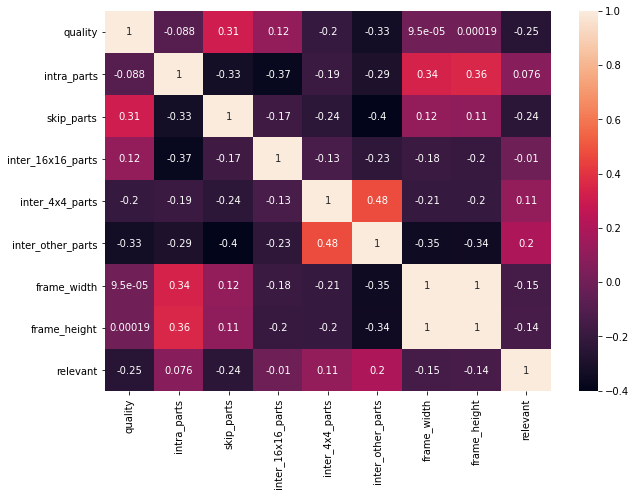

In [20]:
plt.figure(figsize=(10, 7))
corrMatrix = cat.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [21]:
# feels like we need to remove inter_16x16_parts

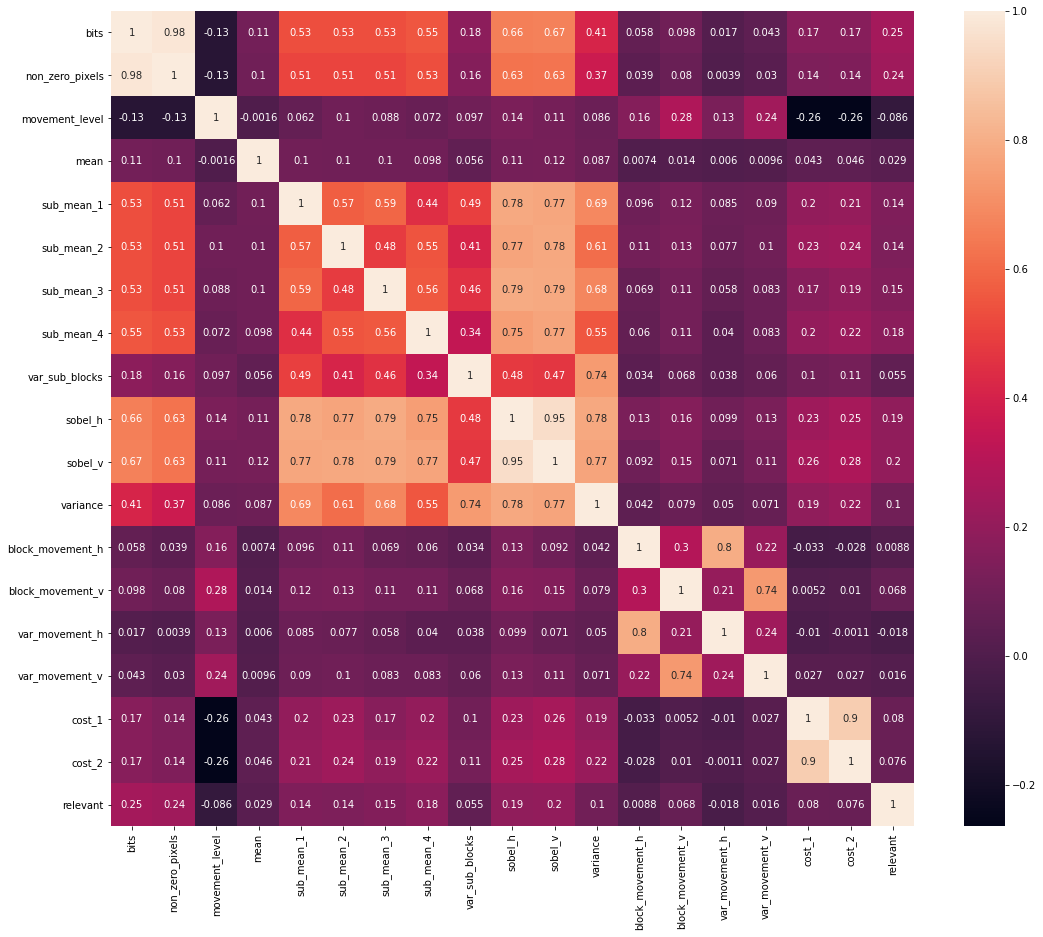

In [22]:
plt.figure(figsize=(18, 15))
corrMatrix = cont_rel.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [23]:
# feels like we need to remove: mean, block_movement_h, var_movement_h, var_movement_v maybe also var_sub_blocks

# END OF DATA DESCRIPTION

In [24]:
# Data Preprocessing

In [25]:
# The column that has less than 200 different values is considered to have categorical data
cat = df.loc[:, df.nunique() < 200]
cont = df.loc[:, df.nunique() >= 200]

In [26]:
# Normalization of continuous data

In [27]:
cont.head()

,bits,non_zero_pixels,movement_level,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4,var_sub_blocks,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2
0,2143,404,42352,6.675781,10.265625,4.335938,5.902344,6.199219,4.796791,17.397461,17.397461,87.584335,2.820312,2.539062,10.772400,8.576599,0.0,0.0
1,1735,381,42352,5.032227,3.699219,4.316406,6.855469,5.257812,1.416102,14.426758,14.233398,48.025330,1.843750,1.921875,6.163086,6.665771,8816.0,8801.0
2,1971,460,42352,6.368164,4.906250,4.277344,9.050781,7.238281,3.615565,15.203125,13.953125,56.613480,3.000000,4.937500,1.625000,3.683594,5104.0,5193.0
3,2473,421,42352,8.407227,6.640625,5.996094,14.675781,6.316406,13.150191,21.725586,29.165039,283.079285,2.078125,2.500000,25.806396,34.656250,21531.0,19802.0
4,1093,167,42352,3.575195,7.531250,4.894531,0.191406,1.683594,8.104800,11.929688,14.353516,175.123245,3.070312,4.523438,22.252869,14.780701,15073.0,14549.0


In [28]:
for var in cont.columns:
    cont[var] = cont[var].apply(lambda x:  x / df[var].max())

<ipython-input-28-917577775497>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont[var] = cont[var].apply(lambda x:  x / df[var].max())


In [29]:
cont.head()

,bits,non_zero_pixels,movement_level,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4,var_sub_blocks,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2
0,0.449172,0.487923,0.00345,0.003046,0.128320,0.056900,0.120360,0.160287,0.004271,0.249583,0.260537,0.043311,0.008756,0.013434,0.000055,0.000125,0.000000,0.000000
1,0.363655,0.460145,0.00345,0.002296,0.046240,0.056643,0.139796,0.135946,0.001261,0.206966,0.213153,0.023749,0.005724,0.010169,0.000032,0.000097,0.020709,0.019720
2,0.413121,0.555556,0.00345,0.002906,0.061328,0.056131,0.184563,0.187153,0.003220,0.218103,0.208956,0.027996,0.009314,0.026124,0.000008,0.000054,0.011990,0.011636
3,0.518340,0.508454,0.00345,0.003837,0.083008,0.078686,0.299267,0.163317,0.011710,0.311674,0.436763,0.139986,0.006452,0.013228,0.000133,0.000507,0.050577,0.044369
4,0.229092,0.201691,0.00345,0.001631,0.094141,0.064230,0.003903,0.043531,0.007217,0.171143,0.214952,0.086600,0.009532,0.023934,0.000114,0.000216,0.035407,0.032599


In [30]:
# Categorical data transofmations:

In [31]:
cat.head()

,quality,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,frame_width,frame_height,relevant
0,22,0,0,1,3,21,416,240,1.0
1,22,0,2,0,3,8,416,240,1.0
2,22,0,0,0,0,8,416,240,1.0
3,22,0,0,0,18,20,416,240,1.0
4,22,0,0,1,3,8,416,240,1.0


In [32]:
from sklearn.preprocessing import LabelEncoder
#This technique has a drawback that it gives the highest priority due to its label
# lowest priority for its label being 0.
encode = LabelEncoder()

for el in cat.columns:
    encode.fit(cat[el])
    cat[el] = encode.transform(cat[el])

<ipython-input-32-53edec57b234>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat[el] = encode.transform(cat[el])


In [33]:
cat.head()

,quality,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,frame_width,frame_height,relevant
0,0,0,0,1,1,21,0,0,1
1,0,0,2,0,1,8,0,0,1
2,0,0,0,0,0,8,0,0,1
3,0,0,0,0,6,20,0,0,1
4,0,0,0,1,1,8,0,0,1


In [34]:
# from sklearn.preprocessing import OneHotEncoder

# hot = OneHotEncoder()
# hotcat = pd.DataFrame(hot.fit_transform(cat[['frame_width', 'frame_height']]))
# cat = pd.concat([cat, hotcat], axis=1)
# cat = cat.drop(['frame_width', 'frame_height'], axis=1)

In [35]:
# First version

In [36]:
df = pd.concat([cont, cat], axis=1)

In [37]:
df.head()

,bits,non_zero_pixels,movement_level,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4,var_sub_blocks,sobel_h,...,cost_2,quality,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,frame_width,frame_height,relevant
0,0.449172,0.487923,0.00345,0.003046,0.128320,0.056900,0.120360,0.160287,0.004271,0.249583,...,0.000000,0,0,0,1,1,21,0,0,1
1,0.363655,0.460145,0.00345,0.002296,0.046240,0.056643,0.139796,0.135946,0.001261,0.206966,...,0.019720,0,0,2,0,1,8,0,0,1
2,0.413121,0.555556,0.00345,0.002906,0.061328,0.056131,0.184563,0.187153,0.003220,0.218103,...,0.011636,0,0,0,0,0,8,0,0,1
3,0.518340,0.508454,0.00345,0.003837,0.083008,0.078686,0.299267,0.163317,0.011710,0.311674,...,0.044369,0,0,0,0,6,20,0,0,1
4,0.229092,0.201691,0.00345,0.001631,0.094141,0.064230,0.003903,0.043531,0.007217,0.171143,...,0.032599,0,0,0,1,1,8,0,0,1


In [70]:
df['relevant'].value_counts()[0]

2841

In [100]:
relevant = df[df.relevant == 0]
not_relevant = df[df.relevant == 1].sample(2841, replace = False)

In [101]:
relevant = relevant.reset_index(drop = True)
not_relevant = not_relevant.reset_index(drop = True)

In [102]:
fin_df = not_relevant.append(relevant)

In [103]:
fin_df['relevant'].value_counts()

1    2841
0    2841
Name: relevant, dtype: int64

In [104]:
fin_df.head()

,bits,non_zero_pixels,movement_level,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4,var_sub_blocks,sobel_h,...,cost_2,quality,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,frame_width,frame_height,relevant
0,0.052190,0.032609,0.014106,0.000566,0.021582,0.022811,0.030588,0.000000,0.000465,0.055507,...,0.002153,1,0,1,2,1,3,0,0,1
1,0.030602,0.018116,0.035955,0.000995,0.046484,0.000000,0.081568,0.025856,0.002632,0.041609,...,0.230564,1,0,0,1,0,6,1,1,1
2,0.049256,0.038647,0.040040,0.000706,0.000000,0.000000,0.031862,0.119584,0.003175,0.075919,...,0.097357,2,0,0,4,0,0,1,1,1
3,0.217984,0.200483,0.882480,0.004617,0.157812,0.140455,0.226143,0.156550,0.005361,0.464030,...,0.096918,1,12,0,0,0,4,3,3,1
4,0.089499,0.068841,0.029170,0.000601,0.000000,0.040855,0.017524,0.033532,0.001151,0.047759,...,0.059768,0,0,0,1,0,11,1,1,1


In [106]:
from sklearn.utils import shuffle

In [107]:
fin_df = shuffle(fin_df).reset_index(drop = True)

In [108]:
fin_df.head()

,bits,non_zero_pixels,movement_level,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4,var_sub_blocks,sobel_h,...,cost_2,quality,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,frame_width,frame_height,relevant
0,0.000629,0.000000,0.866342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001359,...,0.032007,2,0,4,0,0,0,3,3,1
1,0.014462,0.024155,0.471351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002272,0,11,0,0,0,0,2,2,0
2,0.292392,0.342995,0.019629,0.010259,0.285059,0.288189,0.496256,0.538531,0.001458,0.832640,...,0.317878,3,14,0,0,0,0,1,1,1
3,0.039405,0.021739,0.537595,0.000048,0.000000,0.000000,0.000000,0.010908,0.000030,0.005198,...,0.012901,0,0,0,0,0,8,2,2,0
4,0.016139,0.004831,0.234660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000014,...,0.070575,3,0,2,2,0,0,2,2,0


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [113]:
X = fin_df[fin_df.columns[:-1]]
y = fin_df[fin_df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


confusion = metrics.confusion_matrix(y_test,y_pred)

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

accuracy = (TP + TN) / float(TP+TN+FP+FN) # metrics.accuracy_score(y_test, y_pred)
sensitiviy = TP / float(TP+FN)  #recall metrics.recall_score(y_test, y_pred)

specificity = TN / float(TN+FP) #when the actual value is negative, how often is the predicion correct?
precision = TP / float(TP+FP)   #metrics.precision_score(y_test, y_pred)

print("accuracy", accuracy.round(4))  
print("recall", sensitiviy.round(4))
print("specificity", specificity.round(4))
print("precision",precision.round(4))


print(confusion)

accuracy 0.6985
recall 0.6459
specificity 0.7509
precision 0.7205
[[642 213]
 [301 549]]


In [112]:
fin_df.to_csv("tryMe.csv", index=False)

In [83]:
from sklearn.model_selection import train_test_split
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [84]:
from numpy import where
from collections import Counter
from matplotlib import pyplot
# define dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# summarize dataset shape
print(X_train.shape, y_train.shape)
# summarize observations by class label
counter = Counter(y_train)
print(counter)

(11176, 26) (11176,)
Counter({1: 9159, 0: 2017})


In [85]:
y_train[3]

1

In [86]:
# plot the dataset and color the by class label
for label, _ in counter.items():
    row_ix = where(y_train == label)[0]
    
print(row_ix)

[    1     4     5 ... 11136 11151 11162]


In [441]:
# Removing based on observations: mean, block_movement_h, var_movement_h, var_movement_v maybe, var_sub_blocks, inter_16x16_parts
#df2 = df.drop(['mean', 'block_movement_h', 'var_movement_h', 'var_movement_v', 'var_sub_blocks', 'inter_16x16_parts'], axis=1)

In [442]:
#df2.head()

NameError: name 'df2' is not defined

# This is our final selection preprocessing steps (I hope), BUT WITH NO FINAL DATA REMOVALS which we need to do

# Draft

In [42]:
def equality_testing(df, variables, y):
    
    def check_normality(d, var):
        norm_var = var 
        for v in var:
            normality = jarque_bera(d[v])
            if float(normality[1]) < 0.5:
                #norm_var.remove(v)
                print(v + " violates the normality!")
        return norm_var
    
    selected_var = check_normality(df, variables)

    for el in selected_var:
        zero_y = df.loc[df[y] == 0][el].tolist()
        one_y = df.loc[df[y] == 1][el].tolist()
        
        
        sample_size = max(len(zero_y), len(one_y))
        
        
        if ttest_rel(random.choices(zero_y, k = sample_size), random.choices(one_y, k = sample_size)).pvalue >=0.5:
            print("!!!The groups related to 1 or 0 have the same mean :" + el) 
        else:
            print("!!!The groups related to 1 or 0 are different :" + el)